In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
import seaborn as sns
from intercluster.plotting import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# This assumes tex is installed in your system, 
# if not you may simply remove most of this aside from font.size
# To get tex working on linux run the following:
# `sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super`
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": [],
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.size": 32
})

palette = sns.color_palette("husl", 8)
cmap = ListedColormap(palette)

color_dict = {
    'KMeans' : 'grey',
    'DBSCAN' : 'grey',
    'Decision-Tree': cmap(5),
    'Removal-Tree': cmap(1),
    'ExKMC': cmap(0),
    'Shallow-Tree': cmap(3),
    'IDS': cmap(2),
    'DSCluster-Association-Rules': cmap(6),
    'DSCluster-Pointwise-Rules': cmap(7)
}

linestyle_dict = {
    'KMeans' : 'dashed',
    'DBSCAN' : 'dashed',
    'Decision-Tree' : 'solid',
    'Removal-Tree' : 'dashed',
    'ExKMC' : 'solid',
    'Shallow-Tree': 'dashed',
    'IDS': 'dashed',
    'DSCluster-Association-Rules': 'solid',
    'DSCluster-Pointwise-Rules': 'solid'
}

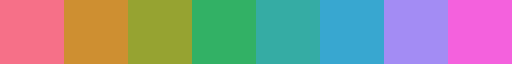

In [26]:
cmap

# Experiment Plotting:
The following is what we use to gather computed information and produce plots/tables. Note that 
our distribution plots are more reliant upon having the data readily available, and 
are therefore plotted as a part of the `interpretable_measurements.py` and `explanation_tree.py`
files. 

In [105]:
# Specify a dataset
dataset = 'digits'

# Specify an experiment
experiment = 'max_rules'

# Specify reference clustering
ref = 'dbscan'

### Max Rules Experiments

In [106]:
# Load experiment results
fname = "../data/experiments/" + dataset + "/" + experiment + "/exp_" + ref + ".csv"
experiment_df = pd.read_csv(fname, header=[0, 1, 2], index_col=0)

# Computes statistics:
grouped = experiment_df.T.groupby(level = [0,1])
mean_df = grouped.mean().T
std_df = grouped.std().T

In [101]:
mean_df

Coverage-Mistake-Score                                          \
   DSCluster-Association-Rules DSCluster-Pointwise-Rules Decision-Tree   
10                       540.9                     197.8        -858.0   
11                       553.0                     205.0        -768.0   
12                       560.5                     211.0        -623.0   
13                       571.8                     216.9        -308.0   
14                       584.6                     222.2        -193.0   
15                       591.8                     226.3        -103.0   
16                       597.8                     230.9         -28.0   
17                       605.1                     234.6          47.0   
18                       613.5                     238.3         122.0   
19                       618.8                     242.2         192.0   
20                       624.9                     245.4         242.0   

                                                        Silhouette-Score  \
     ExKMC  KMeans Removal-Tree Shallow-Tree DSCluster-Association-Rules   
10 -1523.0  1797.0      -1396.0       -698.0                    0.265955   
11 -1378.0  1797.0      -1396.0       -698.0                    0.263320   
12 -1143.0  1797.0      -1396.0       -698.0                    0.259934   
13  -993.0  1797.0      -1396.0       -698.0                    0.257681   
14  -863.0  1797.0      -1396.0       -698.0                    0.251880   
15  -668.0  1797.0      -1396.0       -698.0                    0.249667   
16  -533.0  1797.0      -1396.0       -698.0                    0.249015   
17  -483.0  1797.0      -1396.0       -698.0                    0.248040   
18  -328.0  1797.0      -1396.0       -698.0                    0.245429   
19  -223.0  1797.0      -1396.0       -698.0                    0.242821   
20  -143.0  1797.0      -1396.0       -698.0                    0.241677   

                                            ... max-rule-length               \
   DSCluster-Pointwise-Rules Decision-Tree  ...          KMeans Removal-Tree   
10                  0.280395      0.117302  ...             NaN          9.0   
11                  0.274672      0.115982  ...             NaN          9.0   
12                  0.270909      0.121872  ...             NaN          9.0   
13                  0.265023      0.104682  ...             NaN          9.0   
14                  0.262998      0.104756  ...             NaN          9.0   
15                  0.263609      0.109524  ...             NaN          9.0   
16                  0.261256      0.112194  ...             NaN          9.0   
17                  0.260996      0.114616  ...             NaN          9.0   
18                  0.259278      0.118303  ...             NaN          9.0   
19                  0.256416      0.120583  ...             NaN          9.0   
20                  0.254138      0.120661  ...             NaN          9.0   

                weighted-average-rule-length                            \
   Shallow-Tree  DSCluster-Association-Rules DSCluster-Pointwise-Rules   
10          5.0                     2.223879                  4.303742   
11          5.0                     2.242364                  4.321682   
12          5.0                     2.226424                  4.284096   
13          5.0                     2.230174                  4.342756   
14          5.0                     2.238835                  4.371947   
15          5.0                     2.259202                  4.420294   
16          5.0                     2.267516                  4.437957   
17          5.0                     2.292652                  4.438310   
18          5.0                     2.288749                  4.458819   
19          5.0                     2.300216                  4.468367   
20          5.0                     2.302632                  4.467662   

                                                    

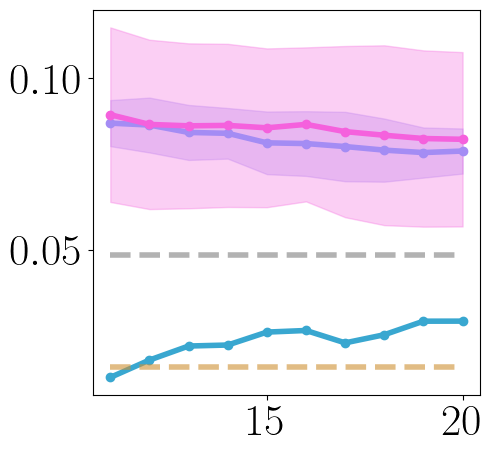

In [108]:
#measurement = 'Coverage-Mistake-Score'
measurement = 'Silhouette-Score'
#measurement = 'weighted-average-rule-length'
xaxis = True
yaxis = True

measurement_mean_df = mean_df[measurement]
measurement_std_df = std_df[measurement]

# Plot results
fig,ax = plt.subplots(1,1,figsize=(5,5))

for method in measurement_mean_df.columns:
    if measurement_mean_df[method].isnull().all():
        continue
    elif measurement_mean_df[method].nunique() == 1:
        ax.hlines(
            y = measurement_mean_df[method].iloc[0],
            xmin = measurement_mean_df.index.min(),
            xmax = measurement_mean_df.index.max(),
            color = color_dict[method],
            alpha = 0.6,
            label = method,
            linewidth = 4,
            linestyle = linestyle_dict[method]
        )
    else:
        ax.plot(
            measurement_mean_df.index,
            measurement_mean_df[method], 
            color = color_dict[method],
            label = method,
            linewidth = 4,
            marker='o',
            markersize = 6,
        )
        ax.fill_between(
            measurement_mean_df.index, 
            measurement_mean_df[method] - measurement_std_df[method],
            measurement_mean_df[method] + measurement_std_df[method],
            color= color_dict[method],
            alpha=0.3
        )


if not xaxis:
    plt.xticks([])
if not yaxis:
    plt.yticks([])

plt.savefig(
    "../figures/" + dataset + "/" + experiment + "/" + ref + "/" + measurement.replace(" ", "_") + ".png",
    bbox_inches='tight'
)
plt.show()
    

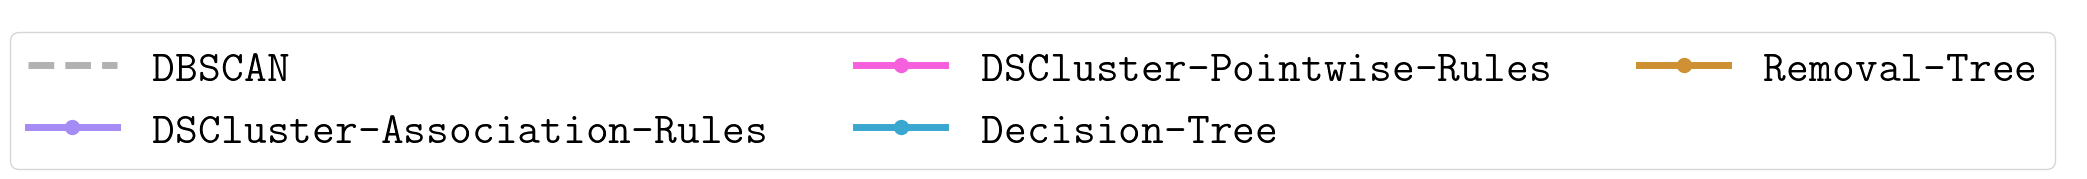

In [90]:
# Legend:
fig, ax = plt.subplots(figsize = (6,1))

legend_elements = []
for method in measurement_mean_df.columns:
    if measurement_mean_df[method].nunique() == 1:
        legend_elements += [
            mlines.Line2D(
                [], [],
                color=color_dict[method],
                lw=5,
                linestyle = linestyle_dict[method],
                label=rf"\texttt{{{method}}}",
                alpha=0.6
            )
        ]
    else:
        legend_elements += [
            mlines.Line2D(
                [], [],
                marker = 'o',
                markersize=10,
                color=color_dict[method],
                lw=5,
                label=rf"\texttt{{{method}}}",
                alpha=1
            )
        ]

ax.legend(handles=legend_elements, ncol=3)
ax.axis('off')

plt.savefig(
    "../figures/" + dataset + "/" + experiment + "/" + ref + "/legend.png",
    bbox_inches='tight'
)

### Older experiments

In [16]:
# Colors and Modules for plotting:
colormap = distortion_cmap
baseline_list = ['KMeans-Full', 'IMM-Full']

# This is just a list of column names to look up in the dataframe
module_list = ['IMM', 'IMM-outliers', 'Forest-Depth-2', 
               'Forest-Depth-3','Forest-Depth-4']

# And these are their corresponding latex versions
legend_module_list = [r'\texttt{IMM}', r'\texttt{IMM-outliers}', r'\texttt{Forest-Depth-2}', 
               r'\texttt{Forest-Depth-3}',r'\texttt{Forest-Depth-4}']

# We give colors to each as follows
color_dict = {mod : i for i,mod in enumerate(module_list)}

In [17]:
# Specify the model:
model = 'Forest-Depth-2'

# And then we'll compute ratios for clustering costs:
measure = 'normalized-clustering-cost'
xlabel = 'minimum coverage'
ylabel = 'distortion'

# Uncomment here to save:
#fname = '../figures/relative_coverage/' + ylabel + '/' + dataset + '/' + model + '.png'
fname = None

xaxis = False
if dataset == 'fashion':
    xaxis = True

yaxis = False
if model == 'IMM-outliers':
    yaxis = True

if not xaxis:
    xlabel = ''
if not yaxis:
    ylabel = ''

# Compute distortion with cost ratios:
cost_df = experiment_df[measure][model]

# Divide by the reference:
distortion_df = cost_df[[model, 'IMM', 'KMeans']].div(cost_df['KMeans'], level=1)

# Find the mean and standard deviation
plot_df = distortion_df.groupby(level=0, axis=1).mean()
plot_std_df = distortion_df.groupby(level=0, axis=1).std()

# More plotting info:
plot_colors = [colormap(color_dict[mod]) for mod in plot_df.columns if mod != 'KMeans']
plot_cmap = ListedColormap(plot_colors)
domain_array = np.array([list(np.linspace(0.5,1,11))] * len(plot_df.columns)).T
domain_df = pd.DataFrame(domain_array, columns = plot_df.columns)

xlim = (0.49, 1.01)
#ylim = (plot_df.min().min() - 0.05, plot_df.max().max() + 0.05)

if dataset == 'climate':
    ylim = (0.95, 1.1)
elif dataset == 'anuran':
    ylim = (0.95, 1.7)
elif dataset == 'covertype':
    ylim = (0.95, 1.4)
elif dataset == 'digits':
    ylim = (0.95, 1.7)
elif dataset == 'mnist':
    ylim = (0.95, 1.25)
elif dataset == 'fashion':
    ylim = (0.95, 1.4)

experiment_plotter(
    plot_df,
    plot_std_df,
    domain_df,
    xlabel = xlabel,
    ylabel = ylabel,
    cmap = plot_cmap,
    baseline_list = ['KMeans'],
    legend = False,
    xlim = xlim,
    ylim = ylim,
    xaxis = xaxis,
    yaxis = yaxis,
    filename = fname,
)

KeyError: 'normalized-clustering-cost'

(0.0, 1.0, 0.0, 1.0)

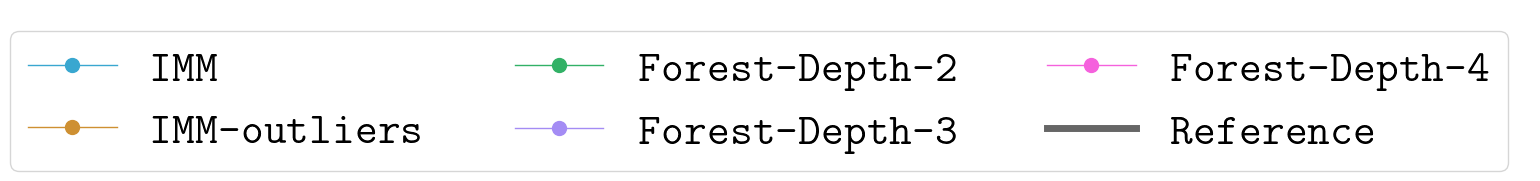

In [ ]:
# Legend:
fig, ax = plt.subplots(figsize = (6,1))
legend_elements = [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=10,
        color=colormap(i),
        lw=1,
        label=mod,
        alpha=1
    )
    for i,mod in enumerate(legend_module_list)
]

legend_elements += [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=0,
        color='k',
        lw=5,
        linestyle = '-',
        label=r"\texttt{Reference}",
        alpha=0.6
    )
]

ax.legend(handles=legend_elements, ncol=3)
ax.axis('off')
#plt.savefig('../figures/relative_coverage/distortion_legend.png', bbox_inches = 'tight', dpi = 300)

### Interpretable Measurements:

In [27]:
# Interpretable Measurements Table
fname = "../data/experiments/" + dataset + "/measurements.csv"
inter_measures_df = pd.read_csv(fname, index_col=0)
inter_measures_df

,coverage,max-rule-length,normalized-clustering-cost,overlap,weighted-average-rule-length
Row,,,,,
forest_depth_2,0.819086,2.0,35.508812,1.160737,2.000000
forest_depth_3,0.809543,3.0,33.223462,1.113150,3.000000
forest_depth_4,0.835143,4.0,32.328097,1.075334,3.627513
forest_depth_imm,0.823486,7.0,32.266952,1.083755,3.802600
imm,1.000000,7.0,39.302320,1.000000,5.052857
outlier,0.800057,6.0,36.508056,1.000000,4.946861


In [28]:
# Additional Results for explanation tree
fname = "../data/experiments/" + dataset + "/explanation_tree.csv"
explanation_tree_df = pd.read_csv(fname, index_col=0)
explanation_tree_df

,normalized-clustering-cost,overlap,coverage,max-rule-legnth,weighted-average-rule-length
0,29.855588,1.0,0.715771,7,5.109452
